In [1]:
import pandas as pd
import spacy, pytextrank
from summarizers.light import FastSummarizer

c:\repos\search-summaries\.venv\Lib\site-packages


In [2]:
# read the CSV file
df = pd.read_csv('unified_dataset.csv')

In [3]:
print("Columns in the dataset:")
print(df.columns.tolist())
print(f"dataset shape: {df.shape}")
print('domain unique values:')
print(df['domain'].unique().tolist())

print("unieque languages:")
print(df['language'].unique().tolist())

#count number of rows which their length is less than 10K
print(f"Number of rows with text length < 10K: {len(df['length'] < 10000)}")

Columns in the dataset:
['url', 'text', 'language', 'domain', 'source', 'length', 'word_count']
dataset shape: (202, 7)
domain unique values:
['www.reuters.com', 'www.bbc.com', 'www.npr.org', 'apnews.com', 'www.cnn.com', 'app.reuters.com', 'github.com', 'www.reddit.com', 'medium.com', 'jinlow.medium.com', 'saannjaay.medium.com', 'dev.to', 'towardsdatascience.com', 'addyo.substack.com', 'umairkhan62.medium.com', 'philipilani.substack.com', 'monovm.substack.com', 'elpais.com', 'www.elmundo.es', 'www.clarin.com', 'www.eluniversal.com.mx', 'ecab-estadistica.medium.com', 'www.lemonde.fr', 'www.lefigaro.fr', 'journal.liberation.fr', 'www.spiegel.de', 'www.zeit.de', 'www.sueddeutsche.de', 'www.faz.net', 'www.xinhuanet.com', 'finance.sina.com.cn', 'www3.xinhuanet.com', 'www.aljazeera.com', 'www.alarabiya.net']
unieque languages:
['english', 'spanish', 'french', 'german', 'chinese', 'arabic']
Number of rows with text length < 10K: 202


<Axes: >

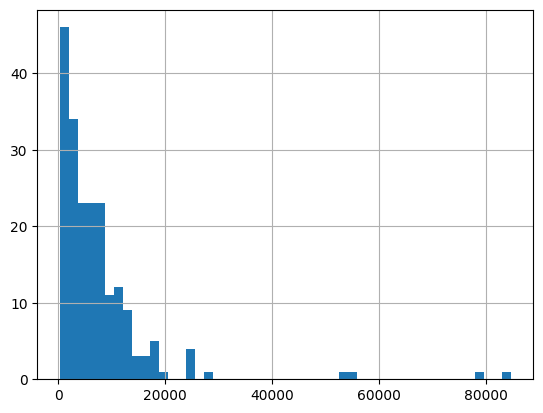

In [4]:
# hist of length column
df['length'].hist(bins=50)

In [5]:
# print some values of documents that their length is more than 4000 but less than 6000
print("Documents with length between 4000 and 6000:")
short = df[(df['length'] > 4000) & (df['length'] < 6000)].head(10)

# long is between 20K and 50K
long = df[(df['length'] > 20000) & (df['length'] < 50000)].head(10)

Documents with length between 4000 and 6000:


In [6]:
print(short.iloc[0]['text'])

Energy
Biden administration announces nearly $11B for renewable energy in rural communities
By
The Associated Press

Corn is planted with a view of wind turbines on April 2, in Lake Benton, Minn. The U.S. Department of Agriculture announced a nearly $11 billion investment on Tuesday to help bring affordable clean energy to rural communities throughout the country.
Jessie Wardarski/AP
hide caption

Corn is planted with a view of wind turbines on April 2, in Lake Benton, Minn. The U.S. Department of Agriculture announced a nearly $11 billion investment on Tuesday to help bring affordable clean energy to rural communities throughout the country.
The U.S. Department of Agriculture announced a nearly $11 billion investment on Tuesday to help bring affordable clean energy to rural communities throughout the country.
Rural electric cooperatives, renewable energy companies and electric utilities will be able to apply for funding through two programs, U.S. Department of Agriculture Secretary To

In [7]:
long_text = long.iloc[0]['text']

In [8]:
short_text = short.iloc[0]['text']
print(f"Length of the text: {len(short_text)}")

Length of the text: 5551


In [9]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textrank", last=True)
doc = nlp(short_text)

# Top K phrases
PHRASES = 3
print("Phrases:", [p.text for p in doc._.phrases[:PHRASES]])

LIMITED_PHRASES = 10
LIMITED_SENTENCES = 5
# Top K summary sentences
summary = [sent.text for sent in doc._.textrank.summary(limit_phrases=LIMITED_PHRASES, limit_sentences=LIMITED_SENTENCES, level="sentence")]
print("Summary:", "\n".join(summary))

Phrases: ['affordable clean energy', 'renewable energy projects', 'renewable energy']
Summary: The U.S. Department of Agriculture announced a nearly $11 billion investment on Tuesday to help bring affordable clean energy to rural communities throughout the country.

The U.S. Department of Agriculture announced a nearly $11 billion investment on Tuesday to help bring affordable clean energy to rural communities throughout the country.

The U.S. Department of Agriculture announced a nearly $11 billion investment on Tuesday to help bring affordable clean energy to rural communities throughout the country.

Energy
Biden administration announces nearly $11B for renewable energy in rural communities
By
The Associated Press

Corn is planted with a view of wind turbines on April 2, in Lake Benton, Minn.
"
The Powering Affordable Clean Energy program will make $1 billion available in partially-forgivable loans for renewable energy companies and electric utilities to help finance renewable energ

In [10]:
doc_long = nlp(long_text)

# Top 5 phrases for long text
print("Phrases for long text:", [p.text for p in doc_long._.phrases[:5]])

# Top 3 summary sentences for long text
summary_long = [sent.text for sent in doc_long._.textrank.summary(limit_phrases=10, limit_sentences=5, level = "sentence")]


for i, sent in enumerate(summary_long):
    print(f"Summary sentence {i+1} for long text:", sent)

Phrases for long text: ['y Tecnológico de la Franja', 'el desarrollo de la IA', 'arancelaria y de control de exportaciones', 'arancelaria y de control de exportaciones como', 'que desregula el desarrollo de IA y lanza']
Summary sentence 1 for long text: La actual reconfiguración global —una globalización partida— se apoya tanto en el resurgir de la guerra política, arancelaria y de control de exportaciones como en políticas industriales enfocadas en la seguridad nacional: Estados Unidos y China destinan miles de millones en subsidios a semiconductores e IA, forzando a las empresas a reordenar sus cadenas de valor y reduciendo su interdependencia.
Summary sentence 2 for long text: Presentan una supercomputadora cuántica "20.000 veces más potente" que las actuales: para qué sirve

 
China impulsa la innovación global en la Segunda Conferencia de Intercambio Científico y Tecnológico de la Franja y la Ruta

 
"Es una ilusión": un estudio de Apple pone el duda el mayor mito de la inteligenc

In [11]:
# 2. Process your document
doc = nlp(short_text)

# 3. Grab the pipeline component
tr = doc._.textrank

# 4. Compute sentence distances (use whatever limit_phrases you want)
sent_dist = tr.calc_sent_dist(limit_phrases=10)   # returns List[Sentence] :contentReference[oaicite:0]{index=0}

# 5. Now segment into paragraphs
paragraphs = tr.segment_paragraphs(sent_dist)     # returns List[Paragraph] :contentReference[oaicite:1]{index=1}

# 6. Inspect your Paragraph objects
for para in paragraphs:
    print(para)

Paragraph(start=0, end=34, para_id=0, distance=0.30676257192004747)


In [12]:
fast_summarizer = FastSummarizer()

In [13]:
long_summary = fast_summarizer.summarize(long_text)

In [14]:
long_summary 

'Keywords : [y Tecnológico de la Franja, el desarrollo de la IA, arancelaria y de control de exportaciones]\n- La actual reconfiguración global —una globalización partida— se apoya tanto en el resurgir de la guerra política, arancelaria y de control de exportaciones como en políticas industriales enfocadas en la seguridad nacional: Estados Unidos y China destinan miles de millones en subsidios a semiconductores e IA, forzando a las empresas a reordenar sus cadenas de valor y reduciendo su interdependencia.\n- Presentan una supercomputadora cuántica "20.000 veces más potente" que las actuales: para qué sirve\n\n \nChina impulsa la innovación global en la Segunda Conferencia de Intercambio Científico y Tecnológico de la Franja y la Ruta\n\n \n"Es una ilusión": un estudio de Apple pone el duda el mayor mito de la inteligencia artificial\n\nTe puede interesar\n\nDía del Padre 2025: por qué se celebra cada 15 de junio, origen y tradición\n\nLos videos y las fotos más impactantes del ataque 